Ad Feature EDA

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
raw_sample = pd.read_csv("raw_first_1000000.csv")
ad_feature = pd.read_csv("ad_feature.csv")

In [4]:

ad_feature.isnull().sum()

adgroup_id          0
cate_id             0
campaign_id         0
customer            0
brand          246330
price               0
dtype: int64

In [5]:
brand_mode = ad_feature['brand'].mode()[0]
ad_feature['brand'] = ad_feature['brand'].fillna(brand_mode)


In [6]:
sample = raw_sample.merge(ad_feature[['adgroup_id', 'cate_id', 'brand', 'price']], on='adgroup_id', how='left')
cate_ctr = sample.groupby('cate_id').agg(cate_ctr=('clk', 'mean'), cate_count=('clk', 'count')).reset_index()


brand_ctr = sample.groupby('brand').agg(brand_ctr=('clk', 'mean'), brand_count=('clk', 'count')).reset_index()



In [7]:
sample['price_level'] = pd.cut(sample['price'],
                               bins=[-np.inf, 50, 200, 500, np.inf],
                               labels=['low', 'medium', 'high', 'very_high'])


sample = sample.merge(cate_ctr, on='cate_id', how='left')
sample = sample.merge(brand_ctr, on='brand', how='left')

In [8]:
train_sample, test_sample = train_test_split(sample, test_size=0.2, random_state=42)

In [9]:
print(sample.head(15))

      user  time_stamp  adgroup_id          pid  nonclk  clk  cate_id  \
0   581738  1494137644           1  430548_1007       1    0     9025   
1   449818  1494638778           3  430548_1007       1    0     5998   
2   914836  1494650879           4  430548_1007       1    0     7958   
3   914836  1494651029           5  430548_1007       1    0     7958   
4   399907  1494302958           8  430548_1007       1    0     1626   
5   628137  1494524935           9  430548_1007       1    0     9784   
6   298139  1494462593           9  430539_1007       1    0     9784   
7   775475  1494561036           9  430548_1007       1    0     9784   
8   555266  1494307136          11  430539_1007       1    0     5239   
9   117840  1494036743          11  430548_1007       1    0     5239   
10  739815  1494115387          11  430539_1007       1    0     5239   
11  623911  1494625301          11  430548_1007       1    0     5239   
12  623911  1494451608          11  430548_1007    

In [19]:
print("Missing values per column:\n", sample.isnull().sum())
print("\nBasic statistics:\n", sample.describe())

Missing values per column:
 user           0
time_stamp     0
adgroup_id     0
pid            0
nonclk         0
clk            0
cate_id        0
brand          0
price          0
price_level    0
cate_ctr       0
cate_count     0
brand_ctr      0
brand_count    0
dtype: int64

Basic statistics:
                user    time_stamp     adgroup_id         nonclk  \
count  9.999990e+05  9.999990e+05  999999.000000  999999.000000   
mean   5.783085e+05  1.494355e+09   98206.022082       0.950507   
std    3.296608e+05  1.986167e+05   48714.683253       0.216895   
min    1.000000e+00  1.494000e+09       1.000000       0.000000   
25%    2.926175e+05  1.494171e+09   57455.000000       1.000000   
50%    5.833010e+05  1.494345e+09  104401.000000       1.000000   
75%    8.621395e+05  1.494516e+09  138523.500000       1.000000   
max    1.141726e+06  1.494691e+09  176356.000000       1.000000   

                 clk        cate_id          brand         price  \
count  999999.000000  999999.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


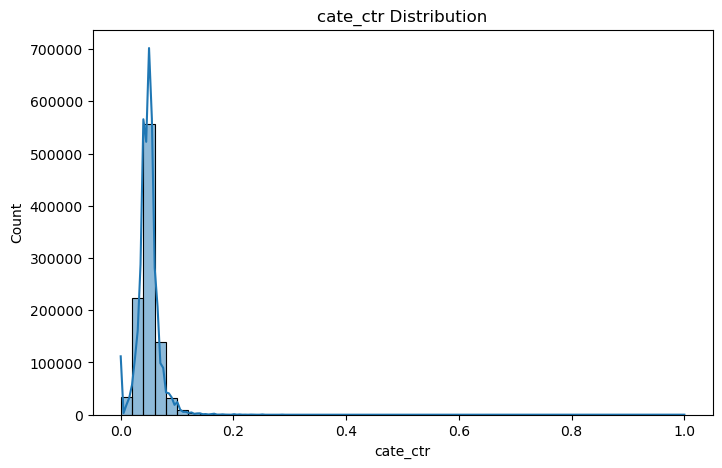

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


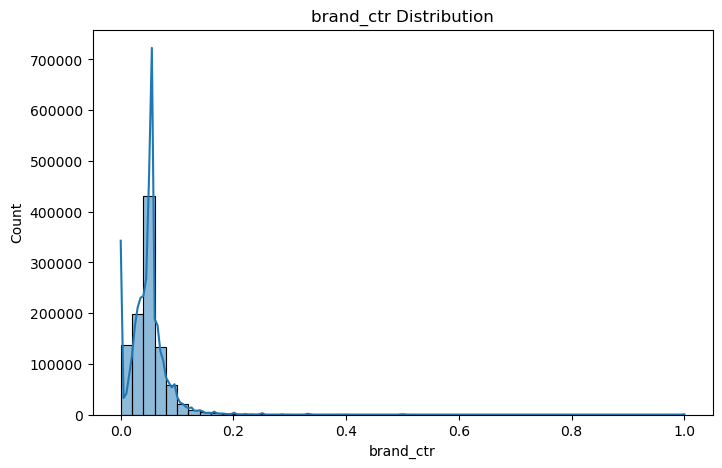

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


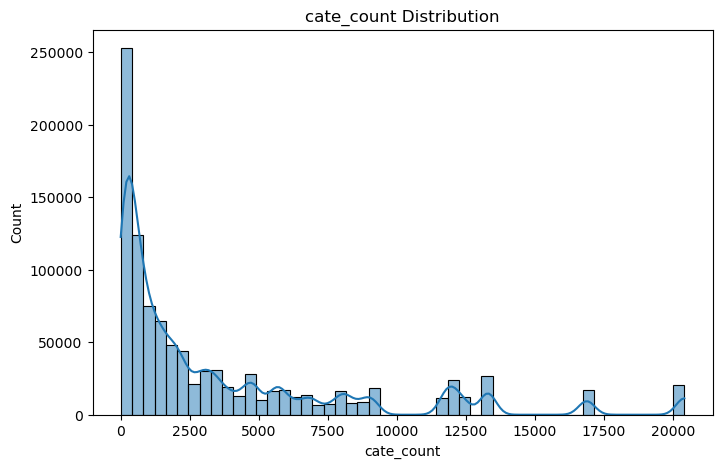

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


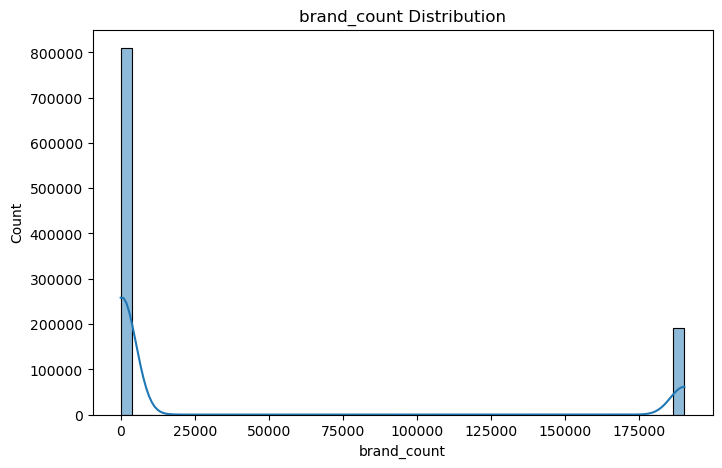

In [21]:
feature_cols = ['cate_ctr', 'brand_ctr', 'cate_count', 'brand_count']
for col in feature_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(sample[col], bins=50, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


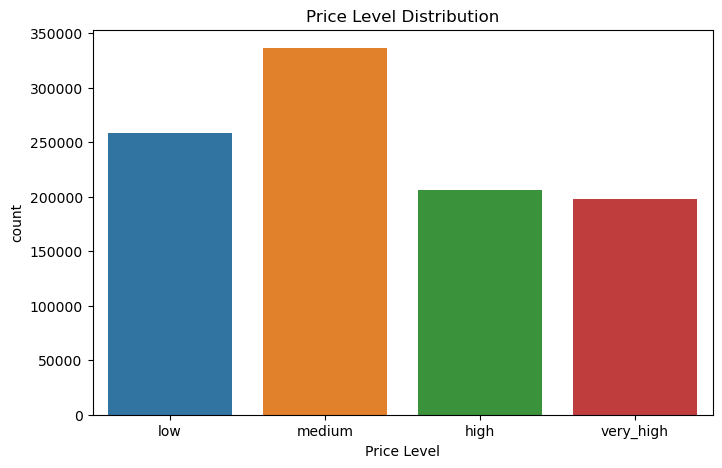

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sample, x='price_level', order=['low', 'medium', 'high', 'very_high'])
plt.title('Price Level Distribution')
plt.xlabel('Price Level')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


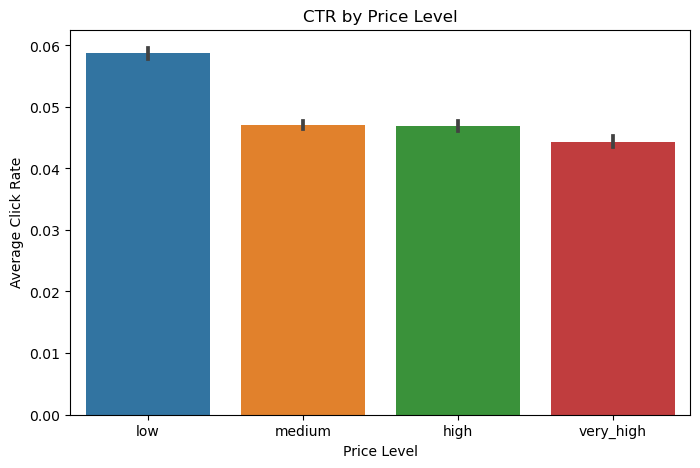

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sample, x='price_level', y='clk', order=['low', 'medium', 'high', 'very_high'])
plt.title('CTR by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Click Rate')
plt.show()

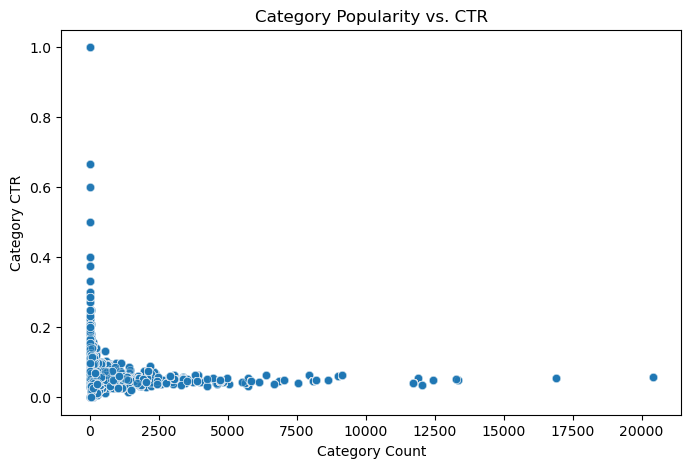

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample, x='cate_count', y='cate_ctr', alpha=0.5)
plt.title('Category Popularity vs. CTR')
plt.xlabel('Category Count')
plt.ylabel('Category CTR')
plt.show()

In [26]:
sample_encoded = pd.get_dummies(sample, columns=['price_level'], drop_first=True)


features = ['cate_ctr', 'cate_count', 'brand_ctr', 'brand_count', 'price'] + \
           [col for col in sample_encoded.columns if col.startswith('price_level_')]
X = sample_encoded[features]
y = sample_encoded['clk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy)


coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': log_reg.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)


Logistic Regression Evaluation:
Accuracy: 0.95022


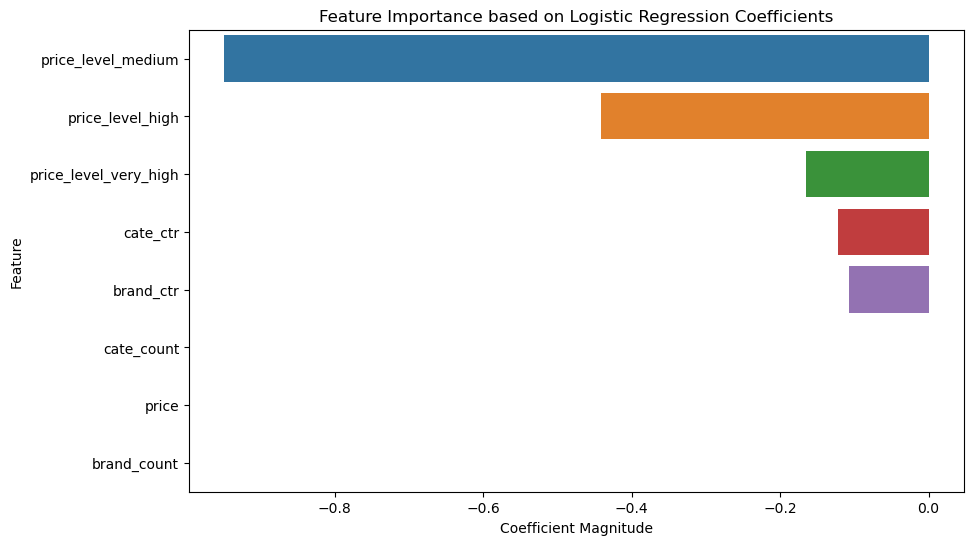

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='coefficient', y='feature')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()